# Background

#### Load Food-101 dataset

In [33]:
import pandas as pd

food101_metadata = pd.read_csv('archive 2/food-101/food-101/meta/train.txt', delimiter='/', header = None)
food101_metadata

,0,1
0,apple_pie,1005649
1,apple_pie,1014775
2,apple_pie,1026328
3,apple_pie,1028787
4,apple_pie,1043283
...,...,...
75745,waffles,981485
75746,waffles,98238
75747,waffles,982668
75748,waffles,995085


In [34]:
food101_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75750 entries, 0 to 75749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       75750 non-null  object
 1   1       75750 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [35]:
food101_metadata.describe()

,1
count,7.575000e+04
mean,1.864864e+06
std,1.149176e+06
min,5.300000e+01
25%,8.362325e+05
50%,1.836550e+06
75%,2.853988e+06
max,3.924720e+06


#### Filter fruits and vegetables

In [41]:
fruits_vegetables_metadata = food101_metadata[food101_metadata[0]
.isin(['orange', 'banana', 'carrot', 'broccoli'])]
fruits_vegetables_metadata.value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [0, 1]
Index: []>

#### Count the number of images for fruits and vegetables, total images and percentage

In [42]:
num_fruits_vegetables = len(fruits_vegetables_metadata)
total_images = len(food101_metadata)
percentage_fruits_vegetables = (num_fruits_vegetables / total_images) * 100
percentage_fruits_vegetables

0.0

In [44]:
train_data_dir = 'archive/train'

In [46]:
import os
from PIL import Image

def count_images_with_keywords(directory, keywords):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    image_count = 0
    
    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            if any(keyword in filename.lower() for keyword in keywords) and os.path.splitext(filename)[1].lower() in image_extensions:
                image_count += 1
    
    return image_count

food101_directory = 'archive 2/food-101/food-101/images' 
fruit_keywords = ['apple', 'apricot', 'avocado', 'banana', 'blackberry', 'blueberry', 'cherry', 'coconut', 'date', 'dragonfruit', 'fig', 'grape', 'kiwi', 'lemon', 'lime', 'mango', 'orange', 'papaya', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'raspberry', 'strawberry', 'watermelon']
vegetable_keywords = ['artichoke', 'asparagus', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'greenbean', 'kale', 'lettuce', 'onion', 'pepper', 'potato', 'pumpkin', 'radish', 'spinach', 'squash', 'sweetpotato', 'tomato', 'zucchini']

num_fruit_images = count_images_with_keywords(food101_directory, fruit_keywords)
num_vegetable_images = count_images_with_keywords(food101_directory, vegetable_keywords)

print("Number of fruit images:", num_fruit_images)
print("Number of vegetable images:", num_vegetable_images)

Number of fruit images: 0
Number of vegetable images: 0


## Assumptions
- Folder names are mapped correctly to images inside it.

# Data

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
num_classes = 36

# Set the path to your dataset
validation_data_dir = 'archive/validation'
test_data_dir = 'archive/test'

2024-03-29 12:58:38.027390: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Data augmentation for better generalizatio

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [3]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [4]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

#### Load and augment training data

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 3115 images belonging to 36 classes.


#### Load validation data

In [6]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 351 images belonging to 36 classes.


#### Load test data

In [7]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 359 images belonging to 36 classes.


### CNN Model Building

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

validation_steps = validation_generator.samples // BATCH_SIZE
validation_predictions = model.predict(validation_generator, steps=validation_steps)

# Get true labels
true_labels = validation_generator.classes
true_labels = validation_generator.classes[:validation_steps * BATCH_SIZE]

# Convert true labels to one-hot encoding
true_labels_one_hot = tf.keras.utils.to_categorical(true_labels, num_classes=num_classes)

# Create a confusion matrix
conf_matrix = confusion_matrix(np.argmax(true_labels_one_hot, axis=1), 
                               np.argmax(validation_predictions, axis=1),
                                labels = np.arange(num_classes))

/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


In [11]:
conf_matrix

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

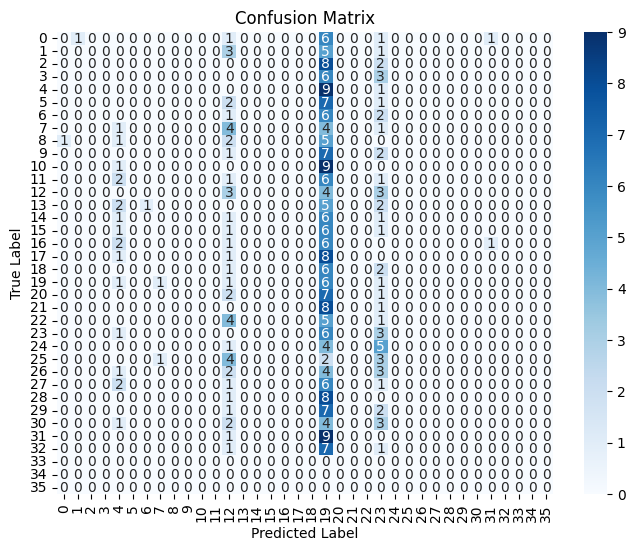

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Assuming y_true and y_pred are your true labels and predicted labels
y_true = np.argmax(true_labels_one_hot, axis=1)
y_pred = np.argmax(validation_predictions, axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
mcc = matthews_corrcoef(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("MCC:", mcc)

Accuracy: 0.0375
Precision: 0.004972164946086446
Recall: 0.0375
F1-Score: 0.008419056248445439
MCC: 0.008539541781137893


/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_history_2 = model.fit(
                         train_generator,
                             epochs =10 ,
                             validation_data = validation_generator,
                               batch_size = 32,
     
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10


/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 9/98 ━━━━━━━━━━━━━━━━━━━━ 1:54 1s/step - accuracy: 0.0691 - loss: 3.6527

/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.3106 - loss: 2.6608 - val_accuracy: 0.8091 - val_loss: 0.6186
Epoch 2/10


2024-03-29 13:02:32.306814: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 7 of 8


 1/98 ━━━━━━━━━━━━━━━━━━━━ 19:46 12s/step - accuracy: 0.7500 - loss: 0.7541

2024-03-29 13:02:33.606731: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.7241 - loss: 0.8789 - val_accuracy: 0.8547 - val_loss: 0.4367
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8077 - loss: 0.5778 - val_accuracy: 0.8803 - val_loss: 0.3546
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8454 - loss: 0.4673 - val_accuracy: 0.8775 - val_loss: 0.3042
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8806 - loss: 0.3714 - val_accuracy: 0.8974 - val_loss: 0.3062
Epoch 6/10


2024-03-29 13:13:34.712725: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 7 of 8
2024-03-29 13:13:36.424054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.8902 - loss: 0.3262 - val_accuracy: 0.9202 - val_loss: 0.2803
Epoch 7/10


2024-03-29 13:16:27.678854: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:7: Filling up shuffle buffer (this may take a while): 7 of 8
2024-03-29 13:16:28.641618: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


98/98 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.9183 - loss: 0.2458 - val_accuracy: 0.9345 - val_loss: 0.2168
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.9280 - loss: 0.2338 - val_accuracy: 0.9316 - val_loss: 0.2264
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.9427 - loss: 0.1906 - val_accuracy: 0.9459 - val_loss: 0.1895
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9424 - loss: 0.1780 - val_accuracy: 0.9459 - val_loss: 0.2188
